In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.display import display, HTML
import calendar

In [2]:
month_array =np.array(["Jan", "Feb", "Mar", "Apr","May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

def remove_zero_row(df, row_name):
    """
    Remove the whole row when there is a '0' value.
    It looks at the specified row name
    """
    return df[df[row_name] != 0]


def get_mean_genre_by_mos(df, genre):
    """
    Gets the mean of the dataset.
    by grouping it with month and 'genre'
    """
    return df.groupby(['month', genre], as_index=False).mean()


def barplot_data(df, y_datapoint, genre):
    """
    Creates a barplot of 'month' against selected data_view.
    """
    # plt.figure(figsize=(10,8))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1)
    sns.barplot(x='month', 
                y=y_datapoint, 
                hue=genre, 
                data=df.sort_values(['month', genre]),
                order=month_array,
                ci=None
                #no bootstrapping will be performed, and error bars will not be drawn for simplicity
                )
    plt.xlabel("Month")
    plt.ylabel("Mean {}".format(y_datapoint.title()))
    plt.title("Mean {} of {} Movies".format(y_datapoint.title(),
                                            genre.title()))
    plt.show()
    return


def scatterplot_data(df, x_datapoint, s_datapoint, genre):
    """
    Creates a scatter plot of selected x_datapoint against 'revenue'.
    Then use s_datapoint as a scaler but not devided by std() due to size implication
    """
    datapoint_other = plt.scatter(df['revenue'][::2], 
                df[x_datapoint][::2], 
                s=(df[s_datapoint][::2]), 
                color=['r'], alpha=0.5
               )
    datapoint_genre_selected = plt.scatter(df['revenue'][1::2], 
                df[x_datapoint][1::2], 
                s=(df[s_datapoint][1::2]), 
                color=['g'], alpha=0.5
               )
    # scaler was not devided by the std() deviation as the bubble appears too small to make small difference between data points
    # Note that the dataframe have 2 sets of 12 month revenue one for Horror and one for other genres. 
    # Even index are other genre and odd are selected genre on input dataframe
    # horror_mean_moviedb_df.head() sample
    # 	month	Horror...........
    # 0	Apr	False	44142.426667
    # 1	Apr	True	40241.644444

    plt.legend((datapoint_other, datapoint_genre_selected),
               ('Other', genre),
               scatterpoints=1,
               loc='upper left',
               ncol=3,
               fontsize=10
               )
    # https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
    plt.title("{} vs Revenue with {} scaled graph of {} genre".format(x_datapoint.title(),
                                                               s_datapoint.title(),
                                                               genre.title()
                                                              )
             )
    plt.xlabel("Mean {}".format(x_datapoint.title()))
    plt.ylabel("Mean Revenue")
    plt.show()
    return


def separate_genre_data(df, genre):
    return df[df[genre]==1]

def change_month_to_string(df):
    """
    Converts Month numeric to String equivalent.
    https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
    """
    df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
    return df
    

In [3]:
movie_data_df = pd.read_csv('tmdb-movies.csv', header=0)
# import data and use row 0 as index

In [4]:
new_moviedb_df =  movie_data_df.join(movie_data_df.pop('genres').str.get_dummies())
# split the genres column to separate columns for ease of data corelation
# source: https://stackoverflow.com/questions/47248727/parsing-csv-file-with-pandas-in-python3

In [5]:
new_moviedb_df.iloc[:, 20 : 40] = new_moviedb_df.iloc[:, 20 : 40].applymap(lambda x: True 
                                                                           if x == 1 
                                                                           else x).applymap(lambda x: False 
                                                                                            if x== 0 
                                                                                            else x)
# Genre location/index has been hardcoded by in future I hope to get this automated thru a variable
# Convert 0 and 1 to Boolean for the Genre field
# https://stackoverflow.com/questions/38499747/converting-all-occurrence-of-true-false-to-1-0-in-a-dataframe-with-mixed-datatyp

In [6]:
new_moviedb_df['month'] = pd.DatetimeIndex(new_moviedb_df['release_date']).month
# Adds a series on the current dataframe by converting the release date to Month of Release

In [7]:
# Data Clean Up
nonzero_moviedb_df = remove_zero_row(new_moviedb_df, 'revenue')
nonzero_moviedb_df = remove_zero_row(new_moviedb_df, 'popularity')
nonzero_moviedb_df = remove_zero_row(new_moviedb_df, 'vote_count')
nonzero_moviedb_df = remove_zero_row(new_moviedb_df, 'vote_average')
# clean zero rows/index looking at specific columns
# Calls the function to remove dataset/whole row

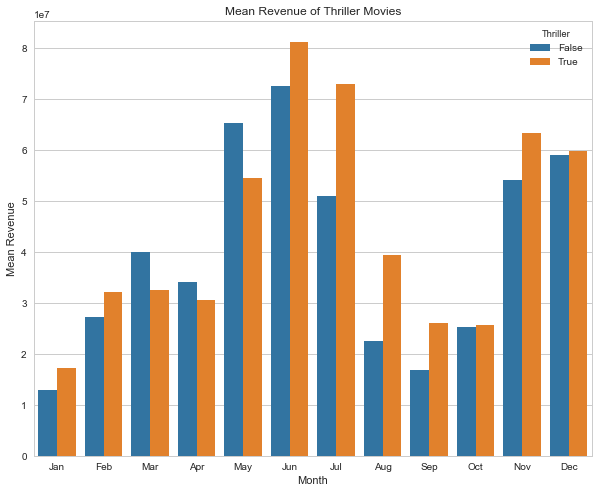

In [8]:
display(HTML("<header><center><h1>Movie Analysis Project</h1></center></header>"))
display(HTML("<header><h3>Is movie earning affected by genre release on relevent season/month of release?</h3></header>"))
display(HTML("<section>- Revenue</section>"))
display(HTML("<section>- Popularity</section>"))
display(HTML("<section>- Average Vote</section>"))
display(HTML("<article><h4>Mean Revenue</h4></article>"))
display(HTML("<article>One would think that thriller or horror movies would be popular during holloween period. In this analysis we will look if a month release of a certain genre like thriller will have impact if release during relevant season/month.</article>"))
display(HTML("<article>The figure below shows the mean average of revenue for a thriller movie has been group release month. This is compared to movies with other genres."))


thriller_mean_moviedb_df = change_month_to_string(get_mean_genre_by_mos(nonzero_moviedb_df, 'Thriller'))
# Group by month and genre specified when function was called

plt.figure(figsize=(10,8))
# sets the size of the graph for the next command
barplot_data(thriller_mean_moviedb_df, 'revenue', 'Thriller')
# Calls function to make a bar plot with database, data and genre

display(HTML("<article>Looking that the revenue plot thriller, there is a higher mean revenue during halloween period compare to most of the other months. Thriller also have higher mean revenue compared to other genres on this period. However, the peak is during the US summer period and have higher mean to other genres during this period.</article>"))

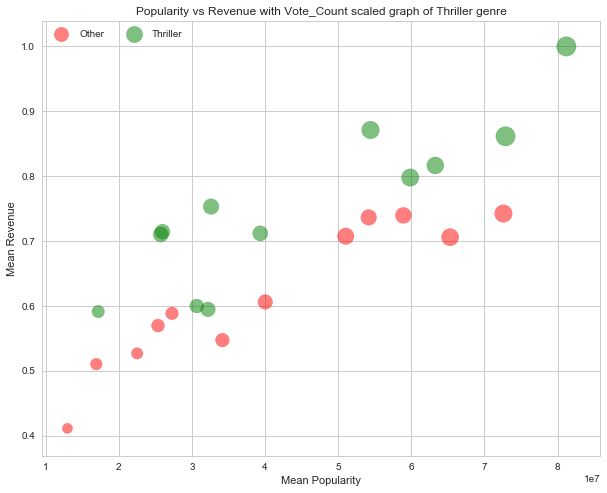

In [9]:
display(HTML("<article><h4>Popularity vs Revenue</h4></article>"))

plt.figure(figsize=(10,8))
# sets the size of the graph for the next command
scatterplot_data(thriller_mean_moviedb_df, 'popularity', 'vote_count', 'Thriller')

display(HTML("<article>The scatter plot of the mean for popularity and revenue gernerally looks to be proportional to each other. Thriller seems to have higher popularity amongst the other genres hence the proportinal mean revenue.</article>"))

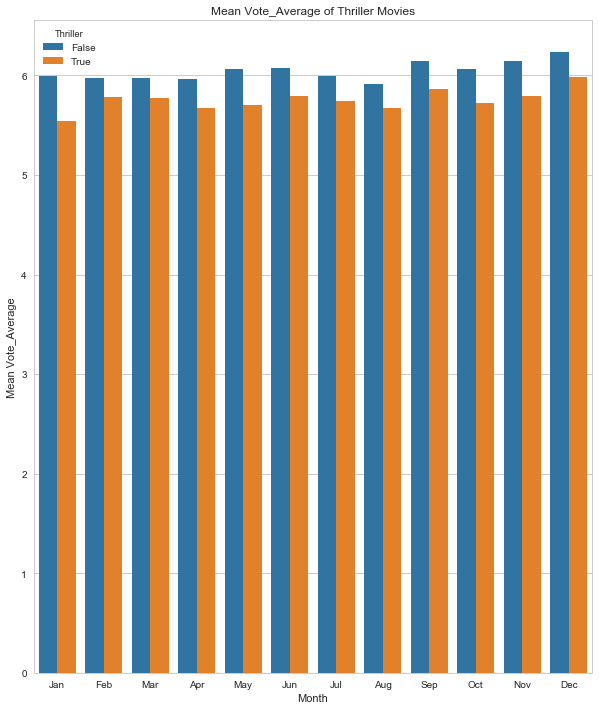

In [10]:
display(HTML("<article><h4>User Average Vote</h4></article>"))
plt.figure(figsize=(10,12))
# sets the size of the graph for the next command
barplot_data(thriller_mean_moviedb_df, 'vote_average', 'Thriller')
display(HTML("<article>The user average votes also paints the same picture. While the gap is very small, other genre still have higher user votes throughout the whole year. But this might be due to lower user vote on some genre that pulls the mean average on other genre.</article>"))

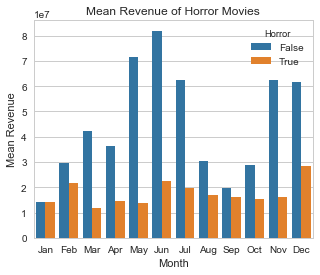

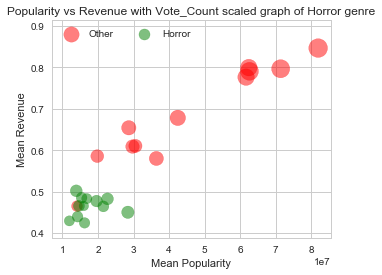

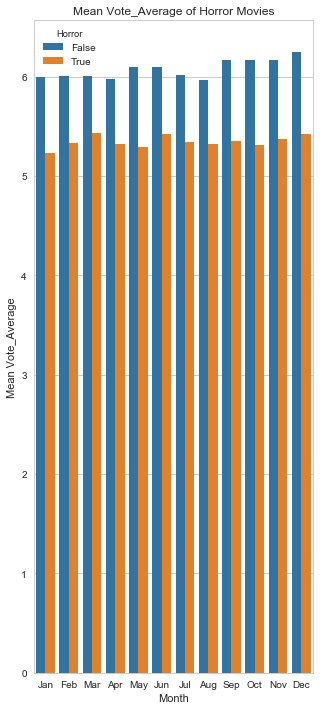

In [11]:
display(HTML("<article><h3>Horror</h3></article>"))
display(HTML("<article><h4>Looking at similar genre, Horror...</h4></article>"))

horror_mean_moviedb_df = change_month_to_string(get_mean_genre_by_mos(nonzero_moviedb_df, 'Horror'))

# Group by month and genre specified when function was called
plt.figure(figsize=(5,4))
# sets the size of the graph for the next command

barplot_data(horror_mean_moviedb_df, 'revenue', 'Horror')

# Calls function to make a bar plot with database, data and genre

plt.figure(figsize=(5,4))
# sets the size of the graph for the next command
scatterplot_data(horror_mean_moviedb_df, 'popularity', 'vote_count', 'Horror')

plt.figure(figsize=(5,12))
# sets the size of the graph for the next command
barplot_data(horror_mean_moviedb_df, 'vote_average', 'Horror')

display(HTML("<article>Horror genre on the other hand while it similar genre the results are quite the oppossite. The mean revenue, popularity and user votes are lower compared to other genres. The only thing similar is the slightly higher horror movie mean revenue during Christmas and US summer period.</article>"))

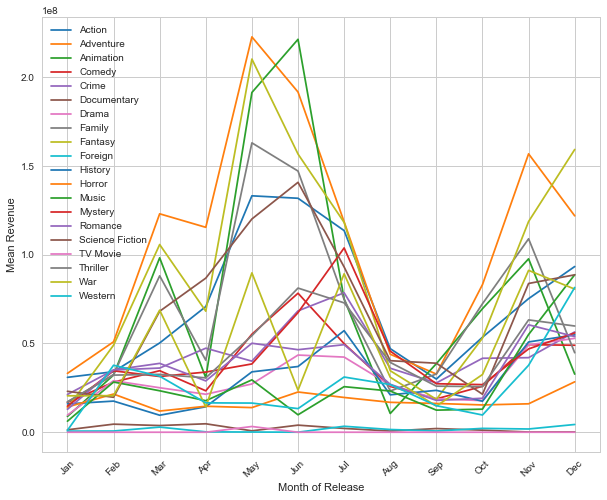

In [12]:
display(HTML("<article><h3>Limitation and Conlusion</h3></article>"))
display(HTML("<article>Looking at the 2 themed genre for halloween, they have quite the opposite reponse. The Thriller have a positive user vote reponse that reflects to their revenue and popularity unlike its similar genre Horror. However, both genre dont have their peak mean revenue during the halloween season but rather they have it on the US Summer season.</article>"))
display(HTML("<article>In conclusion, there seem to be no relevance to themed genre with regards to the month or release or season. Having said that, there is another trend that can be seen on the graph below. Any genre almost always have their peak mean revenue during the US summer in general.</article>"))
plot_color = 1
handles_list = []
plt.figure(figsize=(10, 8))
for genre in nonzero_moviedb_df.columns[20:40]:
    var_db = genre + '_db'
    var_handles = genre + '_handle'
    globals()[var_db] = get_mean_genre_by_mos(separate_genre_data(nonzero_moviedb_df, genre), genre)
    plt.plot(globals()[var_db]['month'], globals()[var_db]['revenue'])
    globals()[var_handles] = mpatches.Patch(label=genre)
    handles_list.append(genre)
    plot_color += 1
plt.xticks(Thriller_db['month'], month_array, rotation=45)
# Since x and y axis are the same for all genre, thriller has been used for simplicty
# https://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html
plt.xlabel('Month of Release')
plt.ylabel('Mean Revenue')
plt.legend(handles_list, loc=2)

plt.show()

display(HTML("<article>With all that in mind, there could be a factor that the Thriller has a better statistics than the Horror. These factor can have a cascade effect to double up/down on the numbers when comparing one genre to the rest. Also only 2 genres have been compared and other season may have better response during their respective season. Lastly, and probably the most impactful of the rest of the factors, a single movie can have multiple genre. There is no way to identify the main genre of the movie on this list unless other coulmns have been factored.</article>"))